In [75]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import pandas as pd

In [76]:
#Data from NYSE on 10/12/2021 at 16:58
N=1000 #initial investment
S_0=154.51 #stock price at t=0
S_011=S_0*1.1
T=1.112 #time to maturity in years; 406 days untill 20 january 2023
r=0.0027 #risk free interest
K_1=np.array([65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150]) #Strike prices
K_2=K_1
X_1=np.array([84.5,86.05,80.75,69.35,67.50,66,57.95,55.65,50.80,46.8,41.35,37.25,33,29,25.35,22.5,18.5,15.5])#ask prices
X_2=np.array([79.50,83.05,78.1,64.5,63.3,63.25,53.75,54.1,48.85,44.15,40.65,36.3,32,27.9,24.45,20.7,17.65,14.6])#bid prices
K_3=np.array([155,160,165,170,175,180,185,190,195,200,210,220])
X_3=np.array([13,10.6,8.75,7.1,5.65,4.6,3.75,2.91,2.92,2.1,1.22,0.92])#out-of-the-money ask prices
OTM_ask=7.1 #ask price of the OTM call option with strike closest to 1.1*S_0
p=0.8 #participation rate

In [77]:
#Amount of money left after placing 0.9Nexp(-rT) on a risk free bank account
q_0 = N*(1-0.9*np.exp(-r*T))
print("Amount of money left after placing 0.9Nexp(-rT) on a risk free bank account:", q_0)

Amount of money left after placing 0.9Nexp(-rT) on a risk free bank account: 102.69810757409037


In [78]:
def q_func(a,b):
    y=(1-0.9*np.exp(-r*T) - a*b/S_0)*np.exp(r*T) #a represents participation rate, b represents ask price X_1
    return y

In [79]:
for i in range(0, len(X_1)):
    print(q_func(p,X_1[i]), X_1[i])
#results here can be negative due to p=0.8

-0.3358207837853142 84.5
-0.3438702858921628 86.05
-0.31634618191390634 80.75
-0.25714339222482635 69.35
-0.24753592196826513 67.5
-0.23974608121970203 66.0
-0.1979406025357465 57.95
-0.1859961800546163 55.65
-0.1608090283009288 50.8
-0.1400361196380937 46.8
-0.11173303158498096 41.35
-0.09044080020557502 37.25
-0.06836958475131277 33.0
-0.04759667608847771 29.0
-0.028641396933640702 25.35
-0.01384069951137073 22.5
0.00693220915146433 18.5
0.022511890648590632 15.5


In [80]:
#Find the most optimal combination of participation rate and percentile margin, starting from a minimum margin of 2%
p_list=np.array([])
q_list=np.array([])
p_try=0.01 #change this to the desired profit margin for the bank to find the optimal p in that scenario
for i in range(0,len(X_1)):
    p=1
    while q_func(p,X_1[i])<p_try:
        p=p-0.001
    print(p,X_1[i],q_func(p,X_1[i]))
    p_list=np.append(p_list,p)
    q_list=np.append(q_list,q_func(p,X_1[i]))
print(len(q_list), len(p_list), len(X_1))

0.16899999999999926 84.5 0.010304561042196866
0.16599999999999926 86.05 0.010279893213159768
0.17699999999999927 80.75 0.010225039751221928
0.2059999999999993 69.35 0.010268208452036832
0.2119999999999993 67.5 0.010113060790461266
0.2169999999999993 66.0 0.010035162382975624
0.24699999999999933 57.95 0.010089366691517661
0.25699999999999934 55.65 0.010164668485420431
0.28199999999999936 50.8 0.010011792860729849
0.3059999999999994 46.8 0.010042952223724083
0.3459999999999994 41.35 0.010131886238936792
0.38399999999999945 37.25 0.010152009994203905
0.4339999999999995 33.0 0.010035162382975428
0.49399999999999955 29.0 0.010009196247146867
0.5649999999999996 25.35 0.01003029373250753
0.6359999999999997 22.5 0.010113060790461
0.7739999999999998 18.5 0.010054636984846755
0.9239999999999999 15.5 0.01003516238297533
18 18 18


In [83]:
print(p_list,q_list)

[0.169 0.166 0.177 0.206 0.212 0.217 0.247 0.257 0.282 0.306 0.346 0.384
 0.434 0.494 0.565 0.636 0.774 0.924] [0.01030456 0.01027989 0.01022504 0.01026821 0.01011306 0.01003516
 0.01008937 0.01016467 0.01001179 0.01004295 0.01013189 0.01015201
 0.01003516 0.0100092  0.01003029 0.01011306 0.01005464 0.01003516]
0.007419074198249541


In [84]:
import operator
index, value = max(enumerate(p_list), key=operator.itemgetter(1))
print("The index of the largest participation rate in the list is",index,"with value", value)
print("The margin for the bank with this participation rate is", q_list[index])
print("The stock price must increase by", 0.1/value*100, "% over the course of", T, "years, for the investor to re-earn the initial investment")
print("The number of call options we need to buy/sell is", p_list[index]*N/S_0)
#We are allowed to buy and sell non-integer number of call options
#print("Round above this becomes", np.ceil(p_list[index]*N/S_0))

The index of the largest participation rate in the list is 17 with value 0.9239999999999999
The margin for the bank with this participation rate is 0.01003516238297533
The stock price must increase by 10.822510822510823 % over the course of 1.112 years, for the investor to re-earn the initial investment
The number of call options we need to buy/sell is 5.98019545660475


In [85]:
#For the PPPNI
print("We buy", p_list[index]*N/S_0, "call options")
print("With ask price", X_1[index])
print("And strike", K_1[index])
print("A participation rate of", p_list[index], 'ensures a percentile margin for the bank of', q_list[index])

We buy 5.98019545660475 call options
With ask price 15.5
And strike 150
A participation rate of 0.9239999999999999 ensures a percentile margin for the bank of 0.01003516238297533


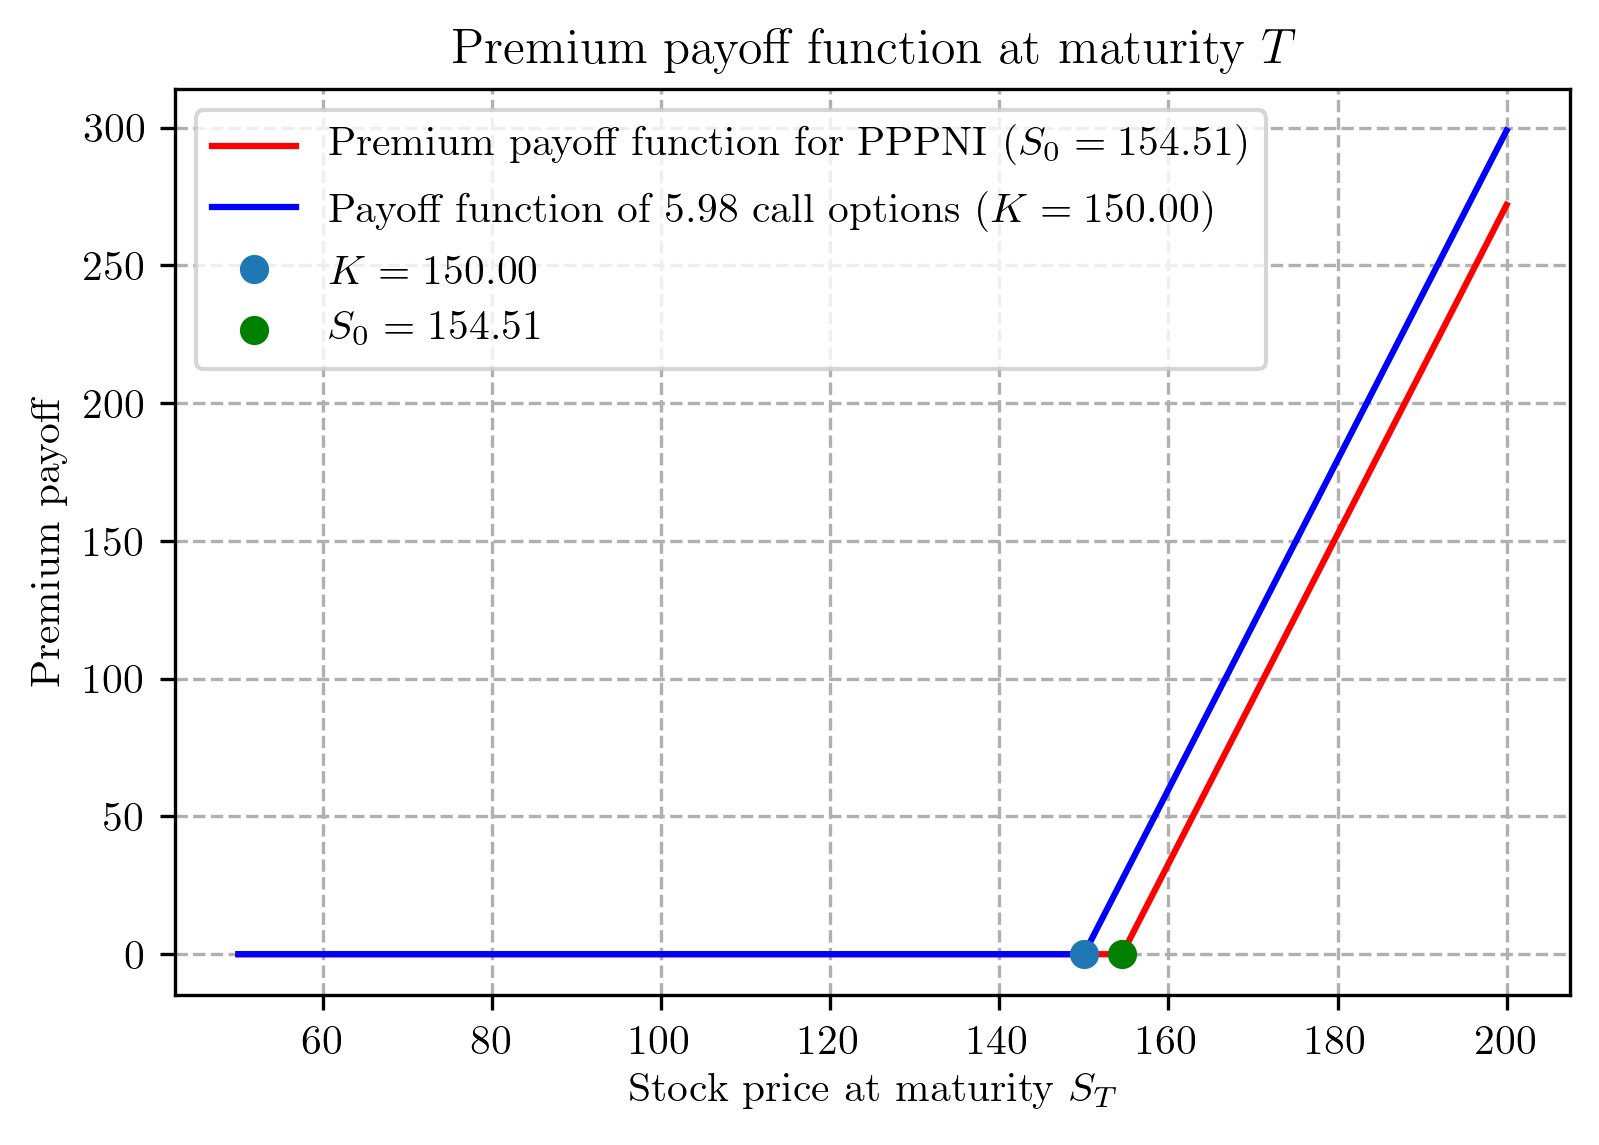

In [86]:
#Making a plot
#Is it relevant to buy/sell an integer number of call options? Or can we buy/sell an arbitrary amount, e.g. 1.42?

#Actual premium
def premium1_bank(x):
    if x < K_1[index]: return 0
    else: return (p_list[index]*N/S_0)*(x-K_1[index])

#Theoretical premium
def premium1_theory(x):
    if x < S_0: return 0
    else: return p_list[index]*N/S_0*(x-S_0)

x = np.arange(50,200,0.01)
y1 = []
y2 = []
for i in range(len(x)):
    y1.append(premium1_bank(x[i]))
    y2.append(premium1_theory(x[i]))
    
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

plt.figure(dpi=300)
plt.plot(x,y2, "red", label= 'Premium payoff function for PPPNI ($S_0=%.2f$)' % S_0)
plt.plot(x,y1, "blue", label= 'Payoff function of %.2f call options ($K=%.2f$)' %(p_list[index]*N/S_0,K_1[index]))
plt.plot(K_1[index],0,'o', label='$K=%.2f$' %K_1[index])
plt.plot(S_0,0,'o', color="green", label='$S_0=%.2f$' %S_0)
plt.title("Premium payoff function at maturity $T$")
plt.ylabel("Premium payoff")
plt.xlabel("Stock price at maturity $S_T$")
plt.grid(linestyle='--')
plt.legend()
plt.savefig('PPPNI.png')
plt.show()

In [87]:
#Define a function for the margin of PPPNII
def q2_func(a,b,c,d,e): #a=K1; b=K2; c=X1; d=X2; e=X3
    y= (1-0.9*np.exp(-r*T)+0.1*(d-c)/(b-a)-e/S_0)*np.exp(r*T)
    return y
print("cost of buying extra call options", N/S_0*X_3)

cost of buying extra call options [84.13694906 68.60397385 56.63063879 45.95171834 36.56721248 29.77153582
 24.27027377 18.83373244 18.89845317 13.59135331  7.89592907  5.95430716]


In [88]:
q2_firstpart = []
strikes = []
ask_bid = []
for i in range(0,len(X_1)):
    for j in range(0,len(X_1)):
        if K_1[i]<K_2[j]:
                if q2_func(K_1[i],K_2[j],X_1[i],X_2[j],0)>0:
                    q2_firstpart.append(q2_func(K_1[i],K_2[j],X_1[i],X_2[j],0)) #calculates the possible percentile margins for the first part
                    strikes.append([K_1[i],K_2[j]]) #saves the corresponding strikes K_1 and K_2
                    ask_bid.append([X_1[i], X_2[j]])
                                        
print(len(q2_firstpart))
#print(q2_firstpart, strikes, ask_bid)
firstpart_moneyleft=[i*N for i in q2_firstpart]#money left available in every different scenario after covering the digital part of PPPNII
#print("money left available after putting part on risk free bank account and building portfolio:", firstpart_moneyleft)

123


In [89]:
index2, value2 = max(enumerate(q2_firstpart), key=operator.itemgetter(1)) #finds the maximum percentile margin from q2_firstpart
print(index2, value2)
print(strikes[index2]) #prints the strikes K_1 and K_2 correspond to the largest percentile margin
print(ask_bid[index2])
n2 = 0.1*N/(strikes[index2][1]-strikes[index2][0]) #calculates the necessary amount of call options to buy/sell
print("amount of money left available in this case:", firstpart_moneyleft[index2])
print("number of call options to buy/sell to approximate the digital part:", n2)
print("number of call options to buy/sell to cover the regular call option part:", N/S_0)

0 0.07391971127728121
[65, 70]
[84.5, 83.05]
amount of money left available in this case: 73.91971127728121
number of call options to buy/sell to approximate the digital part: 20.0
number of call options to buy/sell to cover the regular call option part: 6.472073004983496


In [90]:
q2_list=np.array([])
strikes_ask_bid=[]
for i in range(0,len(X_1)):
    for j in range(0,len(X_1)):
        for k in range(0,len(X_3)):
            #print(K_1[i],K_2[j])
            if K_1[i]<K_2[j]:
                if q2_func(K_1[i],K_2[j],X_1[i],X_2[j],X_3[k])>0:
                    q2_list=np.append(q2_list, q2_func(K_1[i],K_2[j],X_1[i],X_2[j],X_3[k]))
                    strikes_ask_bid.append([K_1[i],K_2[j],X_1[i],X_2[j],X_3[k]])
#print(len(q2_list), q2_list) #percentile margins for the bank with PPPN II that are >0
print(len(q2_list), len(strikes_ask_bid))

392 392


In [91]:
#index3, value3 = max(enumerate(q2_list), key=operator.itemgetter(1)) #finds the maximum percentile margin from q2_firstpart
#print("The index of the largest percentile margin is",index3,"with value", value3)
#print("K_1,K_2,X_1,X_2 and X_3 are respectively", strikes_ask_bid[index3])

The index of the largest percentile margin is 10 with value 0.06794750003671614
K_1,K_2,X_1,X_2 and X_3 are respectively [65, 70, 84.5, 83.05, 0.92]


In [172]:
q2test=[]
for i in range(len(X_3)):
    if K_3[i]<1.1*S_0:
        q2test.append(q2_list[index3]-X_3[i]/S_0*np.exp(r*T))

print(q2test)
profit_margin=0.02
q02=[abs(i-profit_margin) for i in q2test]
index0, value0 = min(enumerate(q02), key=operator.itemgetter(1)) #finds the percentile margin from q2_firstpart closest to 0.02
print("The index of the percentile margin closest to", profit_margin,"is",index0,"with value", q2test[index0])
print("The ask price of the call option corresponding is", X_3[index0])
print("The strike is", K_3[index0])

[-0.016442441406051292, -0.0008627599089249954, 0.01114657791177652]
The index of the percentile margin closest to 0.02 is 2 with value 0.01114657791177652
The ask price of the call option corresponding is 8.75
The strike is 165


In [173]:
#For the PPPNII
print("We buy/sell", n2, "call options")
print("With ask/bid prices respectively", ask_bid[index2])
print("And strikes", strikes[index2])
print("Additionally, we buy", N/S_0, "call options of ask price", X_3[index0], "and strike", K_3[index0])
print("The percentile margin for the bank is", q2test[index0])

We buy/sell 20.0 call options
With ask/bid prices respectively [84.5, 83.05]
And strikes [65, 70]
Additionally, we buy 6.472073004983496 call options of ask price 8.75 and strike 165
The percentile margin for the bank is 0.01114657791177652


70 65 70


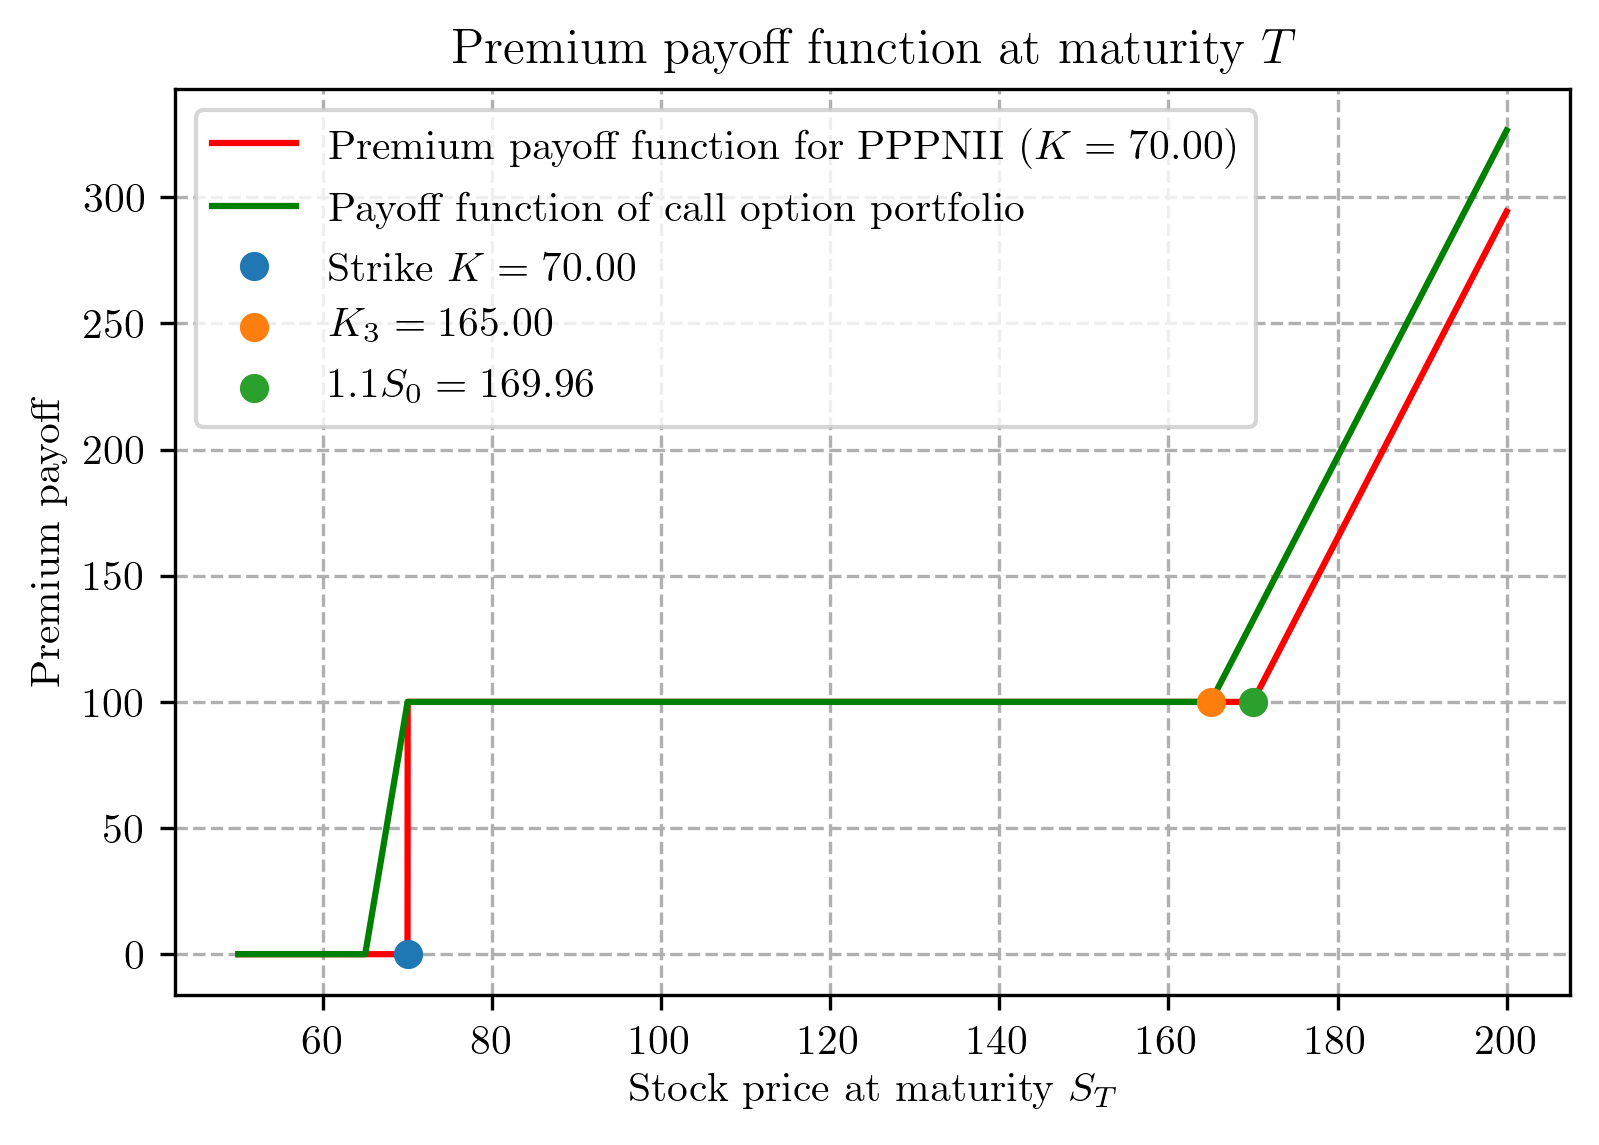

In [179]:
#Makin a plot for PPPN II

K=strikes[index2][1]
K1=strikes[index2][0]
K2=K
print(K,K1,K2)
def premium2(x):
    if x<K: return 0
    if K<x<1.1*S_0: return 0.1*N
    if x>1.1*S_0: return N/S_0*(x-S_0)
    
def callK1(a):
    if a<K1: return 0
    else: return n2*(a-K1)

def callK2(x):
    if x<K2: return 0
    else: return n2*(x-K2)

x2 = np.arange(50,200,0.01)
x3 = np.arange(50,K_3[index0],0.01 )
x4 = np.arange(K_3[index0], 200, 0.01)

y2 = []
y3 = []
for i in range(len(x2)):
    y2.append(premium2(x2[i]))
for i in range(len(x3)):
    y3.append(callK1(x3[i])-callK2(x3[i]))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
    
plt.figure(dpi=300)
plt.plot(x2,y2, 'red', label='Premium payoff function for PPPNII ($K=%.2f$)' %K)
plt.plot(x3, y3,'green', label='Payoff function of call option portfolio')
plt.plot(x4, (N/S_0)*(x4-K_3[index0])+0.1*N, 'green')
plt.plot(K,0,'o', label='Strike $K=%.2f$' %K)
plt.plot(K_3[index0], 0.1*N,'o',label="$K_3=%.2f$" %K_3[index0])
plt.plot(1.1*S_0,0.1*N, 'o', label='$1.1S_0=%.2f$' %S_011)
plt.ylabel("Premium payoff")
plt.xlabel("Stock price at maturity $S_T$")
plt.title("Premium payoff function at maturity $T$")
plt.grid(linestyle='--')
plt.legend()
plt.savefig('PPPNII.png')
plt.show()

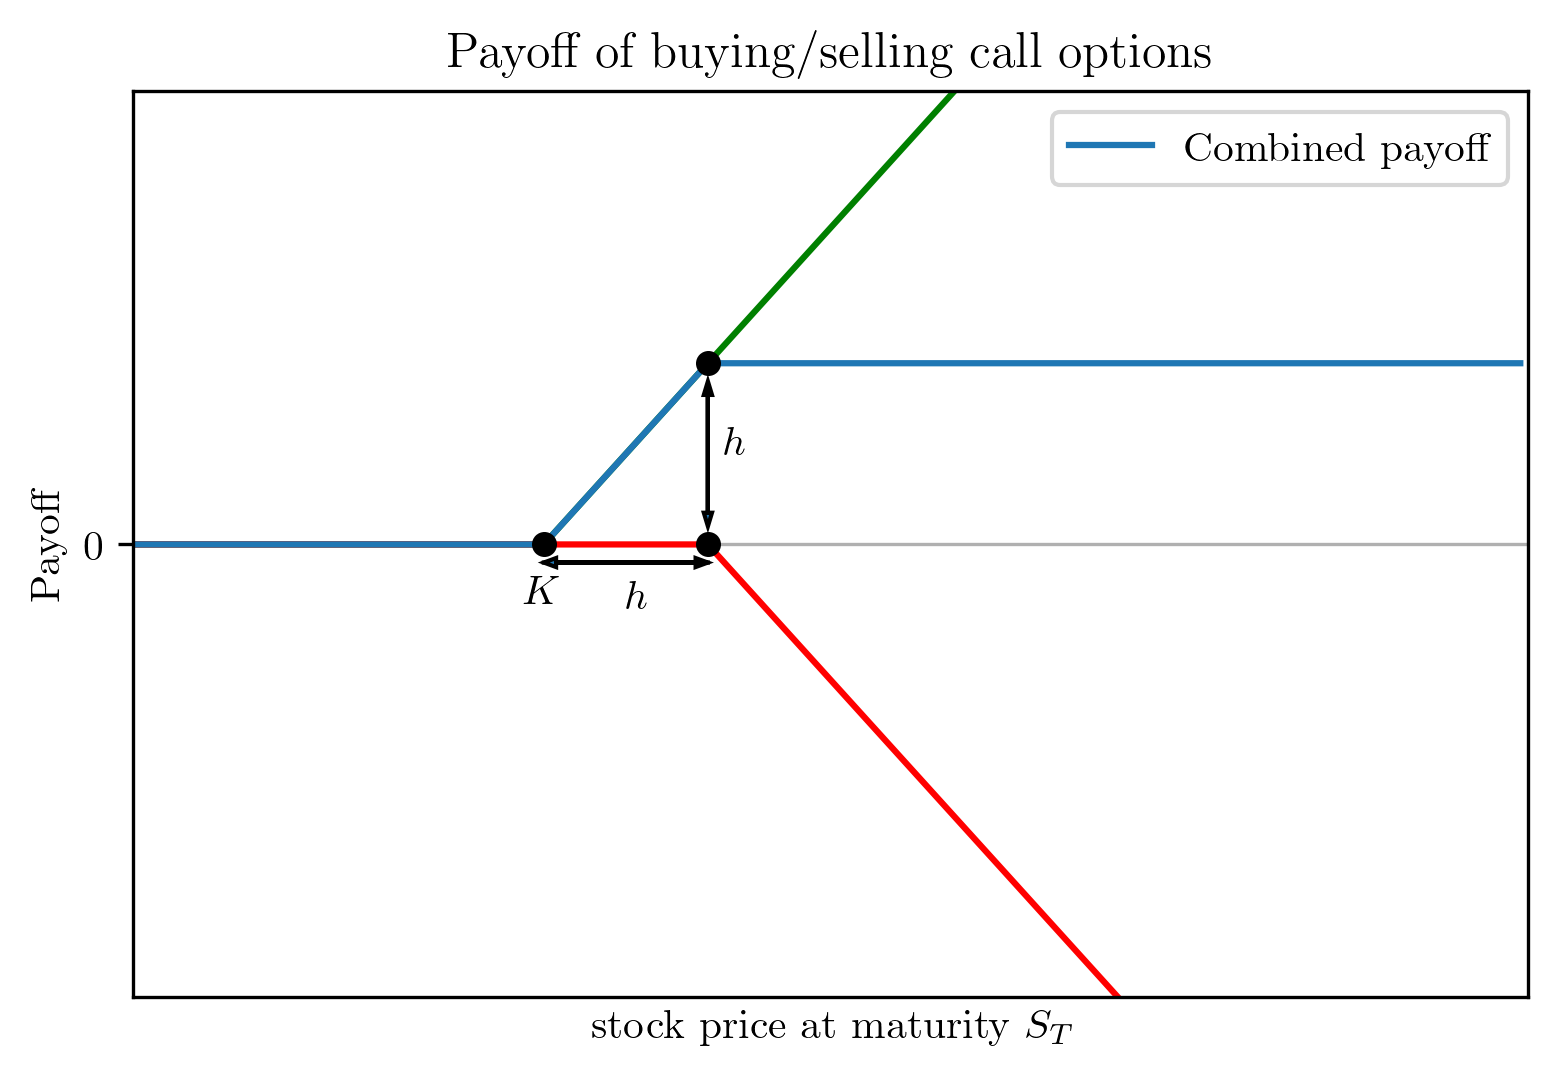

In [167]:
#Illustrate the approximation of the digital part of the premium
K_sell=10
K_buy=8
S_approx=15
def sellcall(x):
    if x<K_sell: return 0
    else: return -x+K_sell

def buycall(x):
    if x<K_buy: return 0
    else: return x-K_buy

x = np.arange(3,20,0.1)
y_sell=[]
y_buy=[]
for i in range(len(x)):
    y_sell.append(sellcall(x[i]))
    y_buy.append(buycall(x[i]))

y=[]
for i in range(len(x)):
    y.append(y_buy[i]+y_sell[i])   

plt.figure(dpi=300)
plt.plot(x,y_buy, 'green')
plt.plot(x, y_sell, 'red')
plt.plot(x, y, label='Combined payoff')
plt.plot(K_buy,0, 'o', color='k', markersize='5')
plt.plot(K_sell, 0, 'o', color='k', markersize='5')
plt.plot(K_sell, K_sell-K_buy, 'o', color='k', markersize='5')
plt.xlim(3,20)
plt.ylim(-5,5)
plt.xticks([])
plt.yticks([0])
plt.xlabel("stock price at maturity $S_T$")
plt.ylabel("Payoff")
plt.text(K_buy-0.25, -0.65, '$K$')
plt.arrow(K_buy, -0.2, 2, 0, shape='full', width=0.0001, head_width=0.1, length_includes_head=True)
plt.arrow(K_sell, -0.2, -2, 0, shape='full', width=0.0001, head_width=0.1, length_includes_head=True)
plt.arrow(K_sell, 0.3, 0, 2-0.5, shape='full', width=0.0001, head_width=0.1, length_includes_head=True)
plt.arrow(K_sell, 2-0.3, 0, -2+0.5, shape='full', width=0.0001, head_width=0.1, length_includes_head=True)
plt.text(K_sell+0.2, 1, '$h$')
plt.text(K_buy+1, -0.7, '$h$')
plt.title("Payoff of buying/selling call options")
plt.grid(linestyle='-')
plt.legend()
plt.savefig('approximation.png')
plt.show()